In [37]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import webbrowser
import os

In [38]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [39]:
app_df = pd.read_csv('C:/Users/Asus/OneDrive/Desktop/Playstore Analysis/googleplaystore.csv')
rev_df = pd.read_csv('C:/Users/Asus/OneDrive/Desktop/Playstore Analysis/googleplaystore_user_reviews.csv')

In [40]:
app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [41]:
rev_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [42]:
#pd.read_csv(): for csv files
#pd.read_excel(): for excel
#pd.read_sql(): SQL Database
#pd.read_json: JSON files

In [43]:
#df.isnull(): finds missing values
#df.dropna(): drops all the rowas and columns having null values from the table
#df.fillna(): replaces the missing values

In [44]:
#df.duplicated(): Indentifies the duplicates in rows
#df.drop_duplicates(): removes duplicates

In [45]:
app_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [46]:
app_df = app_df.dropna(subset=['Rating'])
for column in app_df.columns:
    app_df[column].fillna(app_df[column].mode()[0], inplace = True)
app_df.drop_duplicates(inplace=True)
app_df= app_df[app_df['Rating'] <= 5.0]
rev_df.dropna(subset=['Translated_Review'], inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_4604\2746652995.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [47]:
 app_df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [48]:
#converting the installs column by removing the commas an +
app_df['Installs'] = app_df['Installs'].str.replace(',', '')
app_df['Installs'] = app_df['Installs'].str.replace('+', '')

In [49]:
#converting installs type
app_df['Installs']= app_df['Installs'].astype(int)

In [50]:
#converting price to numeric
app_df['Price'] = app_df['Price'].str.replace('$','').astype(float)

In [51]:
app_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [52]:
#merging both columns using inner join
merge_df = pd.merge(app_df, rev_df, on = 'App', how = 'inner')

In [53]:
merge_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725000,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500000,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800000,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59119,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,1000000,Free,0.0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up,Nice broser slow browsing speed... make 8mbps ...,Positive,0.100000,0.492308
59120,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,1000000,Free,0.0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up,The thing I found missing simple bookmark draw...,Positive,0.225000,0.426786
59121,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,1000000,Free,0.0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up,Great Relief unwanted pop ups showing up. What...,Positive,0.650000,0.625000
59122,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,1000000,Free,0.0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up,Hoped found new go-to; LOVE Firefox PC. Aside ...,Positive,0.345455,0.484848


In [54]:
#Data Transformation
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M',''))
    elif 'k' in size:
        return float(size.replace('k',''))//1024
    else:
        return np.nan

app_df['Size'] = app_df['Size'].apply(convert_size)

In [55]:
app_df['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10834     2.6
10836    53.0
10837     3.6
10839     NaN
10840    19.0
Name: Size, Length: 8892, dtype: float64

In [56]:
app_df['Installs'] = app_df['Installs'].astype(int)
app_df['Reviews'] = app_df['Reviews'].astype(int)

#Logarithmic
app_df['Log_Installs'] = np.log(app_df['Installs'])
app_df['Log_Reviews'] = np.log(app_df['Reviews'])

In [57]:
 app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Log_Installs,Log_Reviews
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,9.210340,5.068904
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,13.122363,6.874198
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,15.424948,11.379508
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,17.727534,12.281384
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,11.512925,6.874198


In [58]:
def rating_group(rating):
    if rating >= 4:
        return 'Top Rated App'
    elif rating >= 3:
        return 'Above Average'
    elif rating >= 2:
        return 'Average'
    else:
        return 'Below Average'

merge_df['Rating_Group'] = merge_df['Rating'].apply(rating_group)

In [59]:
merge_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Rating_Group
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000,Above Average
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333,Above Average
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000,Above Average
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000,Above Average
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000,Above Average


In [60]:
app_df['Revenue'] = app_df['Price'] * app_df['Installs']

In [61]:
#Natural Language Processing

In [62]:
sia = SentimentIntensityAnalyzer()

In [63]:
review = 'I mean the app is bad. I hate the new feature'

sentiment_score = sia.polarity_scores(review)
print(sentiment_score)

{'neg': 0.507, 'neu': 0.493, 'pos': 0.0, 'compound': -0.802}


In [64]:
rev_df['Snetiment_Score'] = rev_df['Translated_Review'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

In [65]:
rev_df.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Snetiment_Score
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667,-0.6486
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222,0.7430
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000,-0.7269
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000,0.7783
64230,Housing-Real Estate & Property,"Useless app, I searched flats kondapur, Hydera...",Negative,-0.316667,0.400000,-0.0829


In [66]:
app_df['Last Updated'] = pd.to_datetime(app_df['Last Updated'], errors='coerce')

In [67]:
app_df['Year'] = app_df['Last Updated'].dt.year

In [68]:
#Plotting Bar Charts

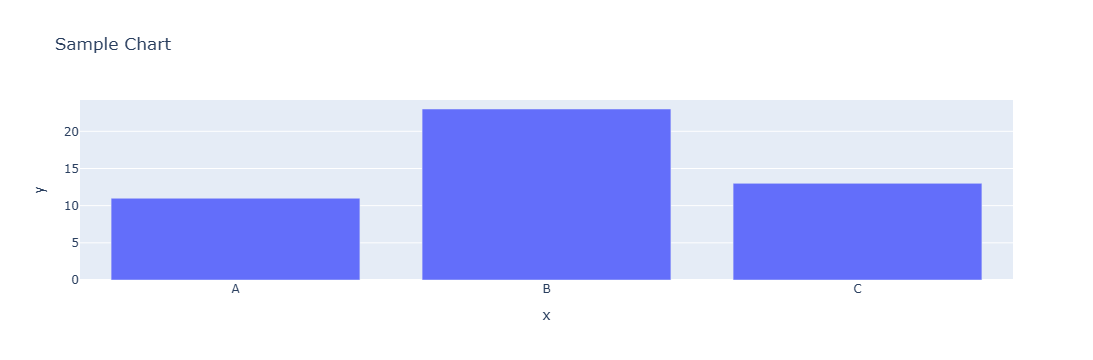

In [69]:
fig = px.bar(x=['A','B','C'], y=[11,23,13], title='Sample Chart')
fig.show()

In [70]:
fig.write_html('interactive_graph.html')

In [72]:
html_files_path = "./"
if not os.path.exists(html_files_path):
    os.makedir(html_files_path)

In [85]:
plot_containers = ""

In [88]:
def save_plot_as_html(fig, filename, insight):
    global plot_containers
    filepath = os.path.join(html_files_path, filename)
    html_content = pio.to_html(fig, full_html=False, include_plotlyjs='inline')
    plot_containers += f"""
    <div class="plot-container" id="{filename}" onclick="openPlot('{filename}')">
        <div class="plot">{html_content}</div>
        <div class="insights">{insight}</div>
    </div>
    """
    fig.write_html(filepath, full_html=False, include_plotlyjs='inline')

In [89]:
plot_width = 400
plot_height = 300
plot_bg_color = 'black'
text_color = 'white'
title_font = {'size': 16}
axis_font = {'size': 12}

# Plots

### Category Graph

In [74]:
category_counts = app_df['Category'].value_counts().nlargest(10)
category_counts

Category
FAMILY             1718
GAME               1074
TOOLS               734
PRODUCTIVITY        334
FINANCE             317
PERSONALIZATION     310
COMMUNICATION       307
LIFESTYLE           305
PHOTOGRAPHY         304
MEDICAL             302
Name: count, dtype: int64

In [87]:
fig1= px.bar(
    x = category_counts.index,
    y = category_counts.values,
    labels = {'x': 'Category', 'y': 'Count'},
    title = 'Top Ranking Categories on Playstore',
    color = category_counts.index,
    color_discrete_sequence = px.colors.sequential.Plasma,
    width = 400,
    height = 300
)

fig1.update_layout(
    plot_bgcolor = 'black',
    paper_bgcolor = 'black',
    font_color = 'white',
    title_font = {'size': 16},
    xaxis = dict(title_font= {'size': 12}),
    yaxis = dict(title_font= {'size': 12}),
    margin = dict(l=10, r=10, t=30, b=10)
)

fig1.update_traces(marker=dict(line=dict(color='white', width=1)))
save_plot_as_html(fig1, "Category_Graph_1.html", "The top categories on the Play Store are dominated by tools, entertainment, and productivity apps. This suggests users are looking for apps that either provide utility or offer leisure activities.")


## Type Analysis Graph

In [92]:
type_counts = app_df['Type'].value_counts().nlargest(10)
type_counts

Type
Free    8279
Paid     613
Name: count, dtype: int64

In [97]:
fig2= px.pie(
    values = type_counts.values,
    names = type_counts.index,
    title = 'App Type Distribution',
    color_discrete_sequence = px.colors.sequential.RdBu,
    width = plot_width,
    height = plot_height
)

fig2.update_layout(
    plot_bgcolor = 'black',
    paper_bgcolor = 'black',
    font_color = 'white',
    title_font = {'size': 16},
    xaxis = dict(title_font= {'size': 12}),
    yaxis = dict(title_font= {'size': 12}),
    margin = dict(l=10, r=10, t=30, b=10)
)

save_plot_as_html(fig2, "Type_Analysis_Graph.html", "Most apps on playstore are free, so apps monetize through ads or in app purchases")

## Rating Distribution Graph

In [104]:
fig3 = px.histogram(
    app_df,
    x = 'Rating',
    nbins = 20,
    title = 'Rating Distribution',
    color_discrete_sequence =["#636EFA"],
    width = plot_width,
    height = plot_height
)

fig3.update_layout(
    plot_bgcolor = 'black',
    paper_bgcolor = 'black',
    font_color = 'white',
    title_font = {'size': 16},
    xaxis = dict(title_font= {'size': 12}),
    yaxis = dict(title_font= {'size': 12}),
    margin = dict(l=10, r=10, t=30, b=10)
)

save_plot_as_html(fig3, "Rating_Distribution_Graph.html", "Ratings are skewed towards higher values, suggesting that most apps are rated favourably on the store by users")

## Sentiment Score Chart 

In [103]:
sentiment_counts = rev_df['Snetiment_Score'].value_counts()
sentiment_counts

Snetiment_Score
 0.0000    3978
 0.4404    1436
 0.6369     980
 0.6249     827
 0.4215     633
           ... 
 0.1476       1
-0.8633       1
 0.6802       1
 0.9155       1
-0.0829       1
Name: count, Length: 4968, dtype: int64

In [105]:
fig4= px.bar(
    x = sentiment_counts.index,
    y = sentiment_counts.values,
    labels = {'x': 'Sentiment Score', 'y': 'Count'},
    title = 'Sentiment Distribution',
    color = sentiment_counts.index,
    color_discrete_sequence = px.colors.sequential.Plasma,
    width = 400,
    height = 300
)

fig4.update_layout(
    plot_bgcolor = 'black',
    paper_bgcolor = 'black',
    font_color = 'white',
    title_font = {'size': 16},
    xaxis = dict(title_font= {'size': 12}),
    yaxis = dict(title_font= {'size': 12}),
    margin = dict(l=10, r=10, t=30, b=10)
)

#fig4.update_traces(marker=dict(line=dict(color='white', width=1)))
save_plot_as_html(fig4, "Sentiment_Score_Graph.html", "Sentiments in the graph show a slight mix of positive and negative reviews with a slight lean towards positive sentiments")


  ## Installs by Category

In [108]:
installs_by_category = app_df.groupby('Category')['Installs'].sum().nlargest(10)
installs_by_category

Category
GAME                  31543862717
COMMUNICATION         24152241530
SOCIAL                12513841475
PRODUCTIVITY          12463070180
TOOLS                 11450724500
FAMILY                10041130590
PHOTOGRAPHY            9721243130
TRAVEL_AND_LOCAL       6361859300
VIDEO_PLAYERS          6221897200
NEWS_AND_MAGAZINES     5393110650
Name: Installs, dtype: int64

In [109]:
fig5= px.bar(
    x = installs_by_category.index,
    y = installs_by_category.values,
    orientation = 'h',
    labels = {'x': 'Installs', 'y': 'Category'},
    title = 'Sentiment Distribution',
    color = installs_by_category.index,
    color_discrete_sequence = px.colors.sequential.Blues,
    width = 400,
    height = 300
)

fig5.update_layout(
    plot_bgcolor = 'black',
    paper_bgcolor = 'black',
    font_color = 'white',
    title_font = {'size': 16},
    xaxis = dict(title_font= {'size': 12}),
    yaxis = dict(title_font= {'size': 12}),
    margin = dict(l=10, r=10, t=30, b=10)
)

#fig4.update_traces(marker=dict(line=dict(color='white', width=1)))
save_plot_as_html(fig5, "Installs_By_Category_Graph.html", "The Categories with the most installs are socials and communication app, reflecting their broad appeal")
